<a href="https://colab.research.google.com/github/MFBS2005/gomycode/blob/main/Final_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import csv
import numpy as np
c=pd.read_csv("/content/drive/My Drive/train.csv")
d=pd.read_csv("/content/drive/My Drive/test.csv")
d.drop("id",axis=1,inplace=True)
c

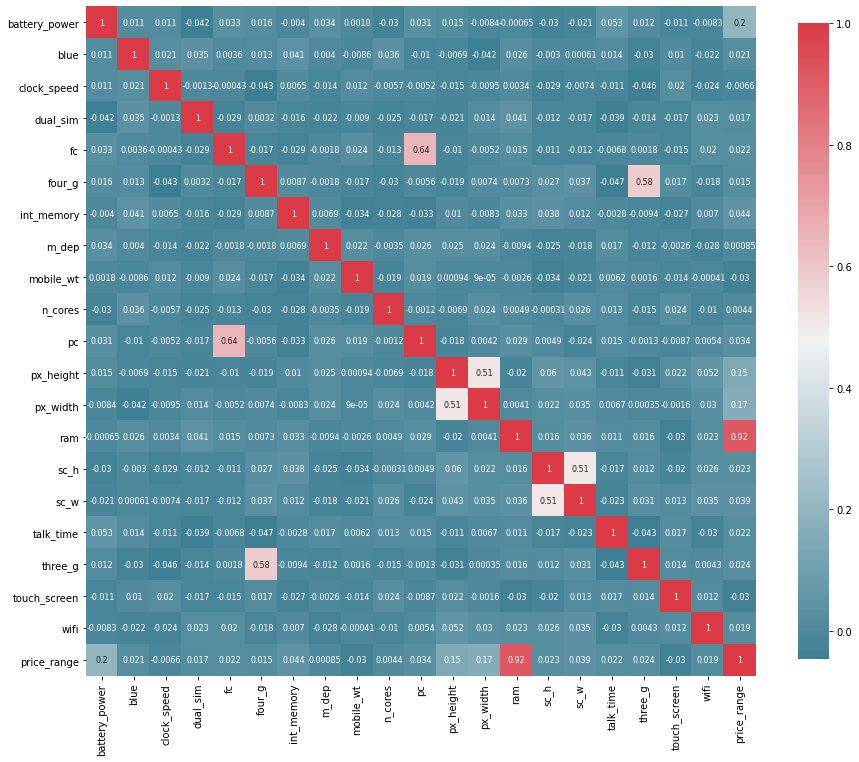

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 15 , 13 ) )
    cmap = sns.diverging_palette( 220 , 10, as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 8}
        )
plot_correlation_map(c)

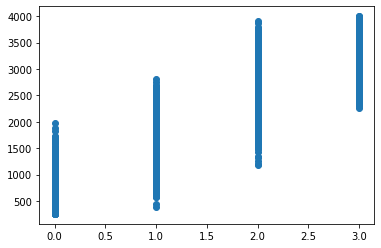

In [69]:
#the biggest correlation is between the ram and the price range.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from matplotlib import pyplot
pyplot.scatter(c["price_range"],c["ram"])
pyplot.show()

0.962
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.94      0.94      0.94       110
           2       0.96      0.93      0.94       125
           3       0.97      0.99      0.98       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



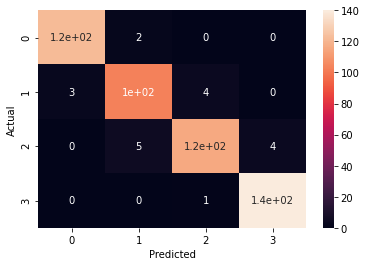

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
xx= c[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y= c['price_range']
sc = StandardScaler()
xx= sc.fit_transform(xx)
xx_train,xx_test,y_train,y_test = train_test_split(xx,y,test_size=0.25,random_state=0)  
log = LogisticRegression(multi_class='multinomial', solver='lbfgs')   
log.fit(xx_train, y_train) 
yyy_pred = log.predict(xx_test)
acc_log=log.score(xx_test, y_test)
print(acc_log)
confusion_matrix = pd.crosstab(y_test, yyy_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
from sklearn.metrics import classification_report
print(classification_report(y_test,yyy_pred))

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
x= c[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
yy= c['price_range']
x_train,x_test,yy_train,yy_test=train_test_split(x,yy,test_size=0.2,random_state=30)
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,yy_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,yy_test),2))
    scores.append(round(accuracy_score(y_pred,yy_test),2))
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,yy_train)
y_pred=knn.predict(x_test)
acc_knn=accuracy_score(y_pred,yy_test)
print(' Final Acuuracy=',acc_knn)

Accuracy for k= 1 is: 0.92
Accuracy for k= 2 is: 0.93
Accuracy for k= 3 is: 0.93
Accuracy for k= 4 is: 0.93
Accuracy for k= 5 is: 0.93
Accuracy for k= 6 is: 0.93
Accuracy for k= 7 is: 0.93
Accuracy for k= 8 is: 0.93
Accuracy for k= 9 is: 0.93
Accuracy for k= 10 is: 0.93
Accuracy for k= 11 is: 0.93
Accuracy for k= 12 is: 0.92
Accuracy for k= 13 is: 0.93
Accuracy for k= 14 is: 0.92
Accuracy for k= 15 is: 0.92
Accuracy for k= 16 is: 0.92
Accuracy for k= 17 is: 0.93
Accuracy for k= 18 is: 0.93
Accuracy for k= 19 is: 0.93
Accuracy for k= 20 is: 0.93
Accuracy for k= 21 is: 0.94
Accuracy for k= 22 is: 0.91
Accuracy for k= 23 is: 0.93
Accuracy for k= 24 is: 0.92
Accuracy for k= 25 is: 0.92
Accuracy for k= 26 is: 0.9
Accuracy for k= 27 is: 0.93
Accuracy for k= 28 is: 0.88
Accuracy for k= 29 is: 0.91
 Final Acuuracy= 0.93


0.765


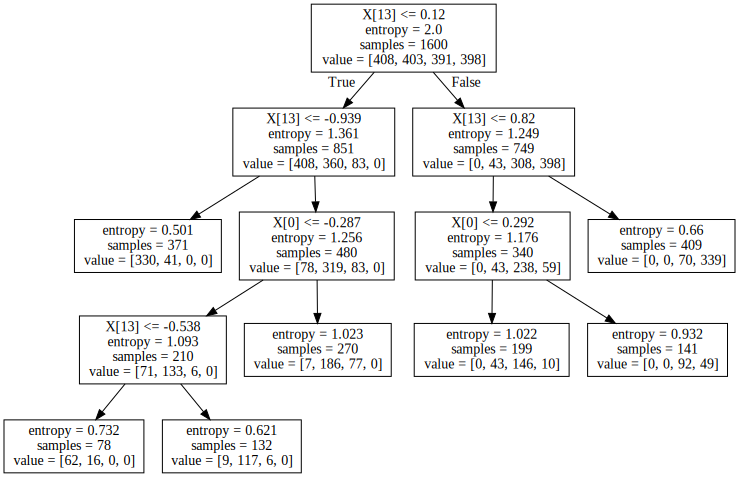

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
xx= c[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y= c['price_range']
sc = StandardScaler()
xx= sc.fit_transform(xx)
xx_train, xx_test, y_train, y_test = train_test_split(xx,y, test_size=0.20,random_state=10)
tree2= tree.DecisionTreeClassifier(criterion="entropy",max_depth=4,max_leaf_nodes=7)  
tree2.fit(xx_train, y_train) 
y_pred=tree2.predict(xx_test)
acc_decision_tree=accuracy_score(y_test, y_pred)
print(acc_decision_tree)
import graphviz
dot_data=tree.export_graphviz(tree2,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("x")
graph


In [73]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(xx_train, y_train) 
y_pred=clf.predict(xx_test)
acc_random_forest= metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", acc_random_forest)

Accuracy: 0.8775


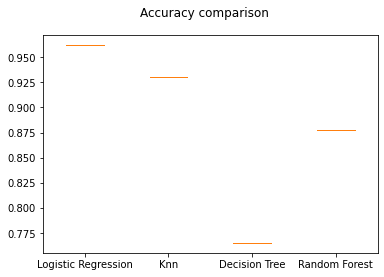

In [74]:
array=np.array
w=[array([acc_log]),
array([acc_knn]),
array([acc_decision_tree]),
array([acc_random_forest])]
fig = plt.figure()
fig.suptitle('Accuracy comparison')
ax = fig.add_subplot(111)
plt.boxplot(w)
ax.set_xticklabels(['Logistic Regression',"Knn", 'Decision Tree', 'Random Forest'])
plt.show()

In [75]:
#the best accuracy is the logistic regression one!

In [ ]:
#let's test it!
u= sc.fit_transform(d)
print(log.predict(u))


In [129]:
s=pd.DataFrame(columns=d.columns)
h=input("type the caracteristic of the phone ordered with a comma separator:")
l1=[]
l2=[]
l3=[]
l1=h.split("-")
for i in range(len(l1)):
  if l1[i]=="True":
    del(l1[i])
    l1.insert(i,1)
  elif l1[i]=="False":
    del(l1[i])
    l1.insert(i,0)
for j in l1:
  l2.append(int(float(j)))
l3.append(l2)
m=pd.DataFrame(l3)
m= sc.fit_transform(m)
R=log.predict(m)[0]
if R==0:
  print("this phone is in the first price range,he is very cheap!")
elif R==1:
  print("this phone is in the second price range,his price is affordable!") 
elif R==2:
  print("this phone is in the third price range,it's quite expensive!")
elif R==3:
  print("this phone is in the fourth price range,it's very expensive!")


type the caracteristic of the phone ordered with a comma separator:1800-True-1.5-False-10-False-24-0.3-120-3-10-220-1000-2400-8-6-5-True-True-True
this phone is in the second price range,his price is affordable!
